<a href="https://colab.research.google.com/github/Orixtosius/RNN_Exercises/blob/main/RNNCheckResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense, Input, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
N = 5   # number of sample >> M 
T = 10  # sequence lenght aka. window size
D = 2   # number of input features >> NX
M = 5   # number of hidden unit
K = 2   # number of output units

In [ ]:
X = np.random.randn(N, T, D)

In [ ]:
X.shape

(5, 10, 2)

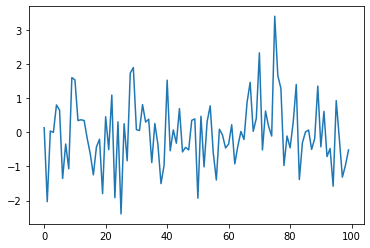

In [ ]:
Temp = X.reshape(-1,1)
plt.plot(Temp, label = 'X values')

In [ ]:
model = Model()

In [ ]:
i = Input(shape = (T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)
model = Model(i,x)

In [ ]:
Yhat = model.predict(X)

In [ ]:
print(Yhat[0])

[-0.7313122   0.57596046]


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 2)]           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[1].get_weights()

[array([[-0.85408974,  0.37113178, -0.54801667,  0.05171549,  0.26204658],
        [-0.16673112, -0.8865255 ,  0.37972033,  0.06821656,  0.91156316]],
       dtype=float32),
 array([[-0.52489865, -0.60513717, -0.1325726 , -0.5710588 ,  0.12085893],
        [ 0.11069419, -0.5295144 , -0.59603995,  0.55128056, -0.21951613],
        [-0.57444996, -0.03363777,  0.45058537,  0.33295944, -0.5958075 ],
        [ 0.61143893, -0.38798785,  0.33370346, -0.33464143, -0.5022598 ],
        [-0.09153192,  0.44917417, -0.5592635 , -0.38358107, -0.5744165 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [ ]:
a, b, c = model.layers[1].get_weights()
print(f"The values a : {a.shape} /b : {b.shape} /c : {c.shape}")

The values a : (2, 5) /b : (5, 5) /c : (5,)


In [ ]:
x,y  = model.layers[2].get_weights()
print(f"The values x : {x.shape} /y : {y.shape}")

The values x : (5, 2) /y : (2,)


In [ ]:
Wxh, Whh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights()

In [ ]:
h_last = np.zeros(M)
x = X[0]
Y_hat = []

for t in range(T):
  ht = np.tanh (x[t].dot(Wxh) + h_last.dot(Whh) + bh)
  y_hat_t = ht.dot(Wo) + bo
  Y_hat.append(y_hat_t)
  h_last = ht

print(Y_hat[-1])

[-0.73131231  0.57596055]
